In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
import timeit, time

In [2]:
start=time.time()
data_np=np.loadtxt("../datas/Manga_Galaxies.dat",skiprows=1,delimiter=",",usecols=range(5))
end=time.time()
time_np=end-start
print("times for numpy load data:",time_np)

times for numpy load data: 0.22619962692260742


In [3]:
start=time.time()
data_df=pd.read_csv("../datas/Manga_Galaxies.dat",delimiter=",",header=0)
end=time.time()
time_df=end-start
print("times for numpy load data:",time_df)

times for numpy load data: 0.046889543533325195


In [4]:
print("Efficiency:",time_df/time_np)

Efficiency: 0.2072927536231884


In [5]:
data_np

array([[ 1.46299874e+02, -1.20001969e-01,  3.00930496e-02,
         1.01863262e+01,  1.83246155e+01],
       [ 1.46300911e+02,  3.54886606e-02,  2.12079994e-02,
         9.19007711e+00,  1.81860256e+01],
       [ 1.45647916e+02, -7.71727775e-01,  2.11050343e-02,
         9.25280870e+00,  1.94469128e+01],
       ...,
       [ 1.58638760e+02,  1.70053284e+01,  1.08115278e-01,
         1.11141147e+01,  1.81087761e+01],
       [ 1.60701290e+02,  9.12804017e+00,  8.91889557e-02,
         1.09545499e+01,  1.80239773e+01],
       [ 1.62168040e+02,  9.17948079e+00,  5.58922701e-02,
         1.03543118e+01,  1.79775562e+01]])

In [6]:
data_df

,RA,DEC,Redshift,Stella_mass,Fiber_mag_r
0,146.299874,-0.120002,0.030093,10.186326,18.324615
1,146.300911,0.035489,0.021208,9.190077,18.186026
2,145.647916,-0.771728,0.021105,9.252809,19.446913
3,145.669169,-0.421002,0.029750,8.848277,20.029844
4,145.229885,0.762573,0.046484,9.844299,18.557238
...,...,...,...,...,...
27183,153.243698,15.645550,0.071871,10.777859,18.014912
27184,157.993124,16.507950,0.055433,10.829354,17.373526
27185,158.638760,17.005328,0.108115,11.114115,18.108776
27186,160.701290,9.128040,0.089189,10.954550,18.023977


Entonces trabajemos con `pandas`

Veamos algunas funciones útiles y buenas de usar esta metodología

Vamos a tomar como punto de partida la tarea (examen) anterior. Recuerden que querían graficar tres perfiles de radiancia a partir de tres leyes fundamentales:

\begin{equation}
B_{planck}=\frac{2hf^3}{c^2}\frac{1}{e^{\frac{hf}{kT}}-1}, \ \ \ B_{wien}=\frac{2hf^3}{c^2}e^{-\frac{hf}{kT}}
\end{equation}

Por simplicidad vamos a suponer que $c=1$, $h=1$ y $k=1$.

In [7]:
f=np.linspace(1E-5,2E-1,100)
def planck(f,T):
    k=1.38E-23
    return 2*f**3/(np.exp(f/T)-1)
def wien(f,T):
    k=1.38E-23
    return 2*f**3*np.exp(-f/T)
f

array([1.00000000e-05, 2.03010101e-03, 4.05020202e-03, 6.07030303e-03,
       8.09040404e-03, 1.01105051e-02, 1.21306061e-02, 1.41507071e-02,
       1.61708081e-02, 1.81909091e-02, 2.02110101e-02, 2.22311111e-02,
       2.42512121e-02, 2.62713131e-02, 2.82914141e-02, 3.03115152e-02,
       3.23316162e-02, 3.43517172e-02, 3.63718182e-02, 3.83919192e-02,
       4.04120202e-02, 4.24321212e-02, 4.44522222e-02, 4.64723232e-02,
       4.84924242e-02, 5.05125253e-02, 5.25326263e-02, 5.45527273e-02,
       5.65728283e-02, 5.85929293e-02, 6.06130303e-02, 6.26331313e-02,
       6.46532323e-02, 6.66733333e-02, 6.86934343e-02, 7.07135354e-02,
       7.27336364e-02, 7.47537374e-02, 7.67738384e-02, 7.87939394e-02,
       8.08140404e-02, 8.28341414e-02, 8.48542424e-02, 8.68743434e-02,
       8.88944444e-02, 9.09145455e-02, 9.29346465e-02, 9.49547475e-02,
       9.69748485e-02, 9.89949495e-02, 1.01015051e-01, 1.03035152e-01,
       1.05055253e-01, 1.07075354e-01, 1.09095455e-01, 1.11115556e-01,
      

In [8]:
wien(f,8E-3)

array([1.99750156e-15, 1.29830051e-08, 8.00916987e-08, 2.09470911e-07,
       3.85246232e-07, 5.84092296e-07, 7.83692308e-07, 9.66423916e-07,
       1.12037543e-06, 1.23898708e-06, 1.32008770e-06, 1.36476348e-06,
       1.37628823e-06, 1.35921935e-06, 1.31869188e-06, 1.25990402e-06,
       1.18776884e-06, 1.10670074e-06, 1.02050477e-06, 9.32340677e-07,
       8.44737955e-07, 7.59643301e-07, 6.78486286e-07, 6.02252977e-07,
       5.31560438e-07, 4.66727472e-07, 4.07838876e-07, 3.54801824e-07,
       3.07393922e-07, 2.65303142e-07, 2.28160212e-07, 1.95564245e-07,
       1.67102508e-07, 1.42365221e-07, 1.20956232e-07, 1.02500356e-07,
       8.66480480e-08, 7.30780199e-08, 6.14982790e-08, 5.16460132e-08,
       4.32866504e-08, 3.62123580e-08, 3.02401904e-08, 2.52100441e-08,
       2.09825380e-08, 1.74369063e-08, 1.44689639e-08, 1.19891857e-08,
       9.92092410e-09, 8.19877698e-09, 6.76711214e-09, 5.57874512e-09,
       4.59376474e-09, 3.77849758e-09, 3.10460052e-09, 2.54827036e-09,
      

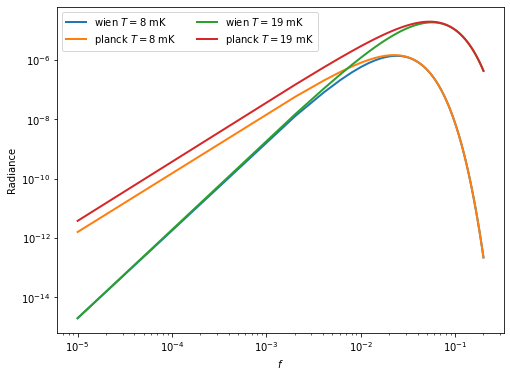

In [9]:
plt.figure(figsize=(8,6))
plt.loglog(f,wien(f,8E-3),lw=2,label="wien $T=8$ mK")
plt.loglog(f,planck(f,8E-3),lw=2,label="planck $T=8$ mK")
plt.loglog(f,wien(f,19E-3),lw=2,label="wien $T=19$ mK")
plt.loglog(f,planck(f,19E-3),lw=2,label="planck $T=19$ mK")
plt.xlabel(r"$f$")
plt.ylabel(r"Radiance")
plt.legend(ncol=2)
plt.show()

In [20]:
datp8=pd.DataFrame(np.array([f,planck(f,8E-3),np.ones(len(f),dtype=int)*8]).T,columns=["frec","planck","temp"])

In [21]:
datp8

,frec,planck,temp
0,0.00001,1.599000e-12,8.0
1,0.00203,5.792777e-08,8.0
2,0.00405,2.016085e-07,8.0
3,0.00607,3.939153e-07,8.0
4,0.00809,6.054909e-07,8.0
...,...,...,...
95,0.19192,5.391198e-13,8.0
96,0.19394,4.321780e-13,8.0
97,0.19596,3.463368e-13,8.0
98,0.19798,2.774573e-13,8.0


In [22]:
datp19=pd.DataFrame(np.array([f,planck(f,19E-3),np.ones(len(f),dtype=int)*19]).T,columns=["frec","planck","temp"])
datp35=pd.DataFrame(np.array([f,planck(f,35E-3),np.ones(len(f),dtype=int)*35]).T,columns=["frec","planck","temp"])

In [23]:
datw8=pd.DataFrame(np.array([f,wien(f,8E-3),np.ones(len(f),dtype=int)*8]).T,columns=["frec","wien","temp"])
datw19=pd.DataFrame(np.array([f,wien(f,19E-3),np.ones(len(f),dtype=int)*19]).T,columns=["frec","wien","temp"])
datw35=pd.DataFrame(np.array([f,wien(f,35E-3),np.ones(len(f),dtype=int)*35]).T,columns=["frec","wien","temp"])

In [24]:
datp19

,frec,planck,temp
0,0.00001,3.799000e-12,19.0
1,0.00203,1.483921e-07,19.0
2,0.00405,5.592758e-07,19.0
3,0.00607,1.188454e-06,19.0
4,0.00809,1.995190e-06,19.0
...,...,...,...
95,0.19192,5.802078e-07,19.0
96,0.19394,5.383309e-07,19.0
97,0.19596,4.993141e-07,19.0
98,0.19798,4.629777e-07,19.0


In [25]:
allplanck=[datp8,datp19,datp35]
allplanck=pd.concat(allplanck)
allplanck

,frec,planck,temp
0,0.00001,1.599000e-12,8.0
1,0.00203,5.792777e-08,8.0
2,0.00405,2.016085e-07,8.0
3,0.00607,3.939153e-07,8.0
4,0.00809,6.054909e-07,8.0
...,...,...,...
95,0.19192,5.899001e-05,35.0
96,0.19394,5.744508e-05,35.0
97,0.19596,5.592313e-05,35.0
98,0.19798,5.442483e-05,35.0


In [26]:
allwien=[datw8,datw19,datw35]
allwien=pd.concat(allwien)
allwien

,frec,wien,temp
0,0.00001,1.997502e-15,8.0
1,0.00203,1.298301e-08,8.0
2,0.00405,8.009170e-08,8.0
3,0.00607,2.094709e-07,8.0
4,0.00809,3.852462e-07,8.0
...,...,...,...
95,0.19192,5.874490e-05,35.0
96,0.19394,5.721977e-05,35.0
97,0.19596,5.571610e-05,35.0
98,0.19798,5.423464e-05,35.0


In [27]:
result = pd.merge(allplanck, allwien, on=["frec","temp"])
result

,frec,planck,temp,wien
0,0.00001,1.599000e-12,8.0,1.997502e-15
1,0.00203,5.792777e-08,8.0,1.298301e-08
2,0.00405,2.016085e-07,8.0,8.009170e-08
3,0.00607,3.939153e-07,8.0,2.094709e-07
4,0.00809,6.054909e-07,8.0,3.852462e-07
...,...,...,...,...
295,0.19192,5.899001e-05,35.0,5.874490e-05
296,0.19394,5.744508e-05,35.0,5.721977e-05
297,0.19596,5.592313e-05,35.0,5.571610e-05
298,0.19798,5.442483e-05,35.0,5.423464e-05


In [28]:
list(set(result["temp"]))

[8.0, 35.0, 19.0]

In [34]:
ii=result["temp"]==8
jj=result["temp"]==19
kk=result["temp"]==35

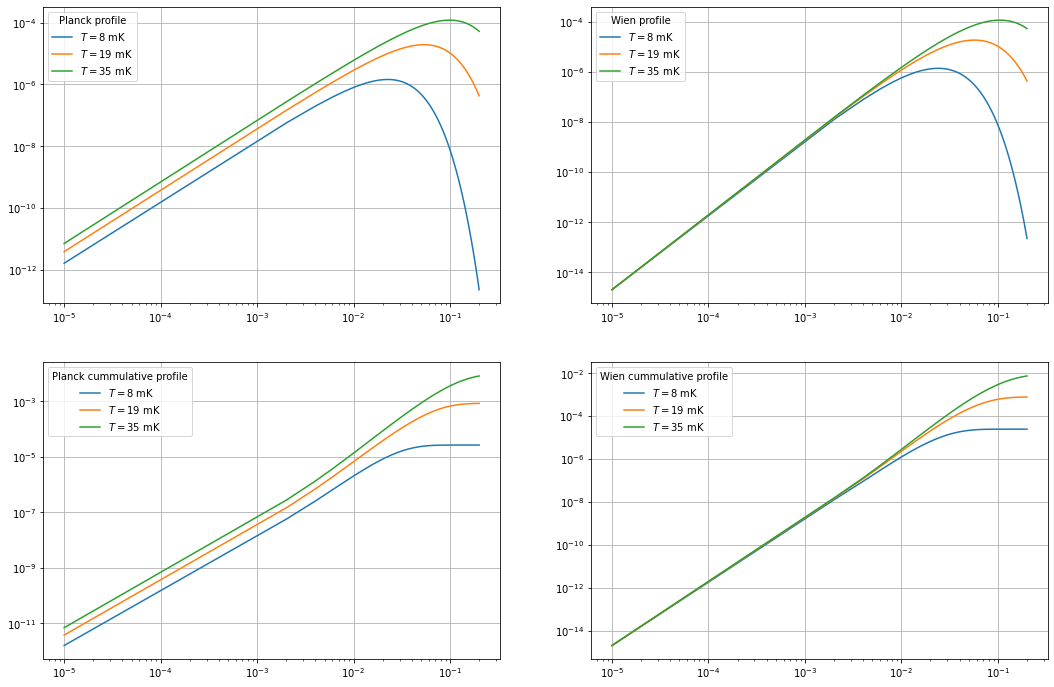

In [47]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.loglog(result["frec"][ii],result["planck"][ii],label="$T=8$ mK")
plt.loglog(result["frec"][jj],result["planck"][jj],label="$T=19$ mK")
plt.loglog(result["frec"][kk],result["planck"][kk],label="$T=35$ mK")
plt.legend(title='Planck profile')
plt.grid()
plt.subplot(222)
plt.loglog(result["frec"][ii],result["wien"][ii],label="$T=8$ mK")
plt.loglog(result["frec"][jj],result["wien"][jj],label="$T=19$ mK")
plt.loglog(result["frec"][kk],result["wien"][kk],label="$T=35$ mK")
plt.legend(title='Wien profile')
plt.grid()
plt.subplot(223)
plt.loglog(result["frec"][ii],np.cumsum(result["planck"][ii]),label="$T=8$ mK")
plt.loglog(result["frec"][jj],np.cumsum(result["planck"][jj]),label="$T=19$ mK")
plt.loglog(result["frec"][kk],np.cumsum(result["planck"][kk]),label="$T=35$ mK")
plt.legend(title='Planck cummulative profile')
plt.grid()
plt.subplot(224)
plt.loglog(result["frec"][ii],np.cumsum(result["wien"][ii]),label="$T=8$ mK")
plt.loglog(result["frec"][jj],np.cumsum(result["wien"][jj]),label="$T=19$ mK")
plt.loglog(result["frec"][kk],np.cumsum(result["wien"][kk]),label="$T=35$ mK")
plt.legend(title='Wien cummulative profile')
plt.grid()

plt.show()

Vamos a trabajar con algunos datos y vamos a ir construyendo

This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
       example.)  The data set contains 3 classes of 50 instances each,
       where each class refers to a type of iris plant.  One class is
       linearly separable from the other 2; the latter are NOT linearly
       separable from each other.
       
![fig](../figures/9cd67d6eb353a0ce1702bd6c9be7710f.jpeg) 
![fig](../figures/cuidados-de-la-planta-de-iris.jpg)

In [49]:
iris=pd.read_csv("../datas/iris.data",names=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"])

In [50]:
iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
iris.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
sepal length in cm,1.000000,-0.109369,0.871754,0.817954
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544
petal length in cm,0.871754,-0.420516,1.000000,0.962757
petal width in cm,0.817954,-0.356544,0.962757,1.000000


### "Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets."

![fig](../figures/1*OAFEIg9w1XHyZk0xBud14A.png)

## Scatter plots

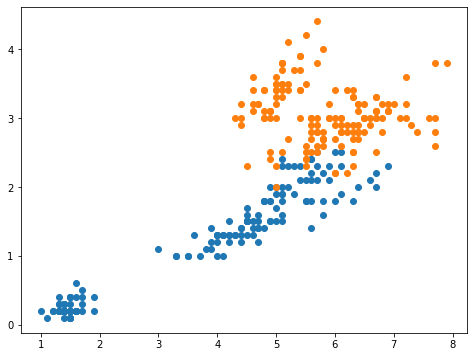

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(iris["petal length in cm"],iris["petal width in cm"])
plt.scatter(iris["sepal length in cm"],iris["sepal width in cm"])
plt.show()

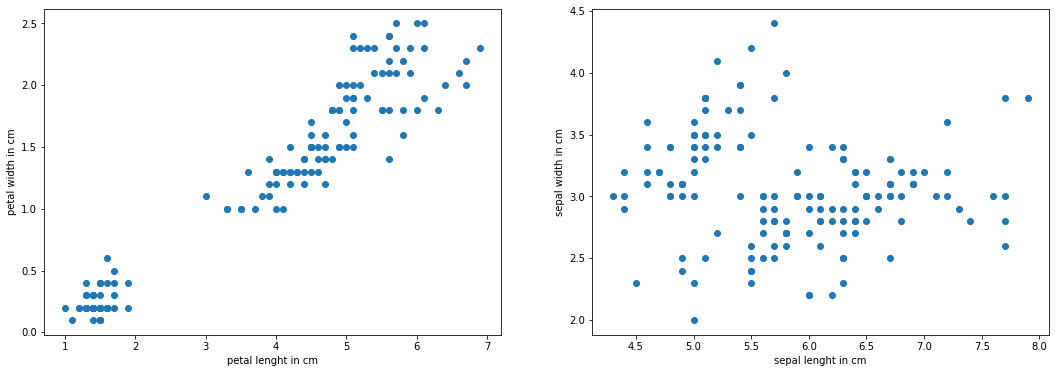

In [56]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.scatter(iris["petal length in cm"],iris["petal width in cm"])
plt.xlabel("petal lenght in cm")
plt.ylabel("petal width in cm")
plt.subplot(122)
plt.scatter(iris["sepal length in cm"],iris["sepal width in cm"])
plt.xlabel("sepal lenght in cm")
plt.ylabel("sepal width in cm")
plt.show()

In [59]:
list(set(iris["class"]))

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

In [62]:
ii=iris["class"]=="Iris-virginica"
jj=iris["class"]=="Iris-setosa"
kk=iris["class"]=="Iris-versicolor"

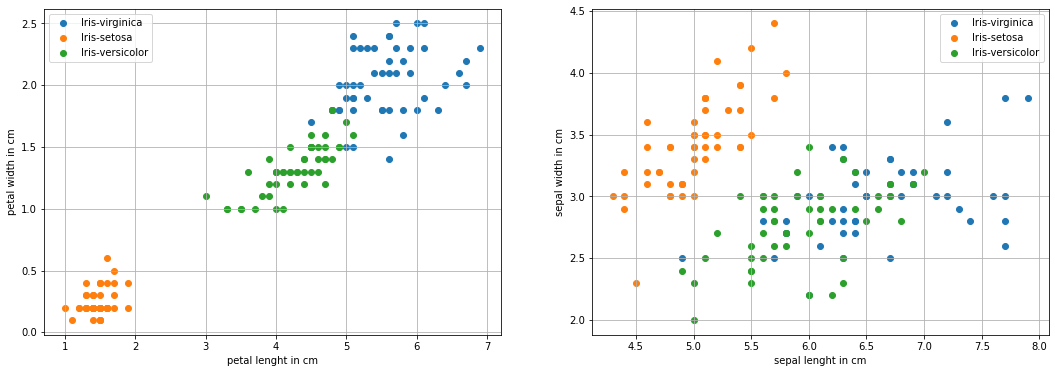

In [65]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.scatter(iris["petal length in cm"][ii],iris["petal width in cm"][ii],label="Iris-virginica")
plt.scatter(iris["petal length in cm"][jj],iris["petal width in cm"][jj],label="Iris-setosa")
plt.scatter(iris["petal length in cm"][kk],iris["petal width in cm"][kk],label="Iris-versicolor")
plt.xlabel("petal lenght in cm")
plt.ylabel("petal width in cm")
plt.legend()
plt.grid()
plt.subplot(122)
plt.scatter(iris["sepal length in cm"][ii],iris["sepal width in cm"][ii],label="Iris-virginica")
plt.scatter(iris["sepal length in cm"][jj],iris["sepal width in cm"][jj],label="Iris-setosa")
plt.scatter(iris["sepal length in cm"][kk],iris["sepal width in cm"][kk],label="Iris-versicolor")
plt.legend()
plt.grid()
plt.xlabel("sepal lenght in cm")
plt.ylabel("sepal width in cm")
plt.show()

## Histogramas

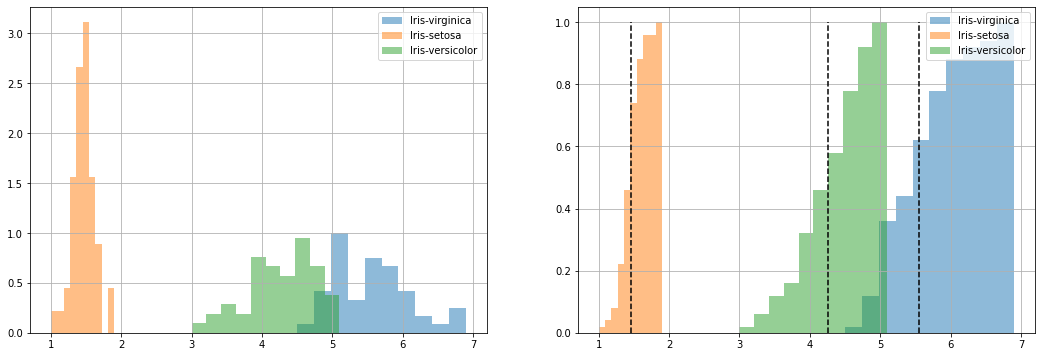

In [86]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(iris["petal length in cm"][ii],bins=10,density=True,histtype='stepfilled',alpha=0.5,label="Iris-virginica")
plt.hist(iris["petal length in cm"][jj],bins=10,density=True,histtype='stepfilled',alpha=0.5,label="Iris-setosa")
plt.hist(iris["petal length in cm"][kk],bins=10,density=True,histtype='stepfilled',alpha=0.5,label="Iris-versicolor")
plt.grid()
plt.legend()
plt.subplot(122)
plt.hist(iris["petal length in cm"][ii],bins=10,density=True,cumulative=True,histtype='stepfilled',alpha=0.5,label="Iris-virginica")
plt.hist(iris["petal length in cm"][jj],bins=10,density=True,cumulative=True,histtype='stepfilled',alpha=0.5,label="Iris-setosa")
plt.hist(iris["petal length in cm"][kk],bins=10,density=True,cumulative=True,histtype='stepfilled',alpha=0.5,label="Iris-versicolor")
plt.vlines(iris["petal length in cm"][jj].mean(),0,1,linestyles='--',color='k')
plt.vlines(iris["petal length in cm"][kk].mean(),0,1,linestyles='--',color='k')
plt.vlines(iris["petal length in cm"][ii].mean(),0,1,linestyles='--',color='k')
plt.grid()
plt.legend()
plt.show()

## Agrupando

In [87]:
iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
iris_gr=iris.groupby(['class']).mean()
iris_gr

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


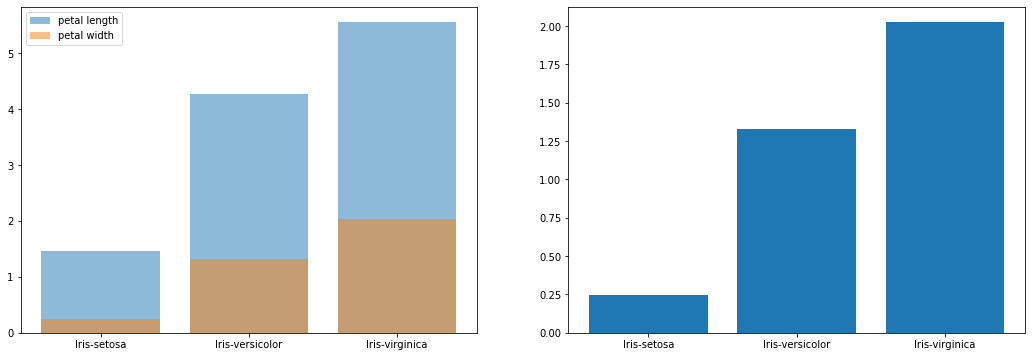

In [105]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(iris_gr.index,iris_gr["petal length in cm"],label="petal length",alpha=0.5)
plt.bar(iris_gr.index,iris_gr["petal width in cm"],label="petal width",alpha=0.5)
plt.legend()
plt.subplot(122)
plt.bar(iris_gr.index,iris_gr["petal width in cm"])

plt.show()

In [109]:
iris_gr=iris.groupby(['class']).size()
iris_gr

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

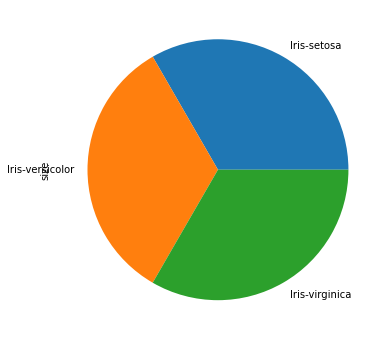

In [116]:
plt.figure(figsize=(8,6))
iris_gr.plot.pie(y='class',label="size")
plt.show()

In [118]:
algo=iris["petal length in cm"][ii]
algo.min(), algo.max()

(4.5, 6.9)

In [119]:
vec=[len(algo[(algo>4)&(algo<5)]),len(algo[(algo>=5)&(algo<6)]),len(algo[(algo>=6)&(algo<7)])]

In [127]:
vec2=["4-5","5-6","6-7"]

In [128]:
vec2

['4-5', '5-6', '6-7']

In [129]:
data=pd.DataFrame(vec,index=vec2,columns=["cantidad"])
data


,cantidad
4-5,6
5-6,33
6-7,11


<Figure size 576x432 with 0 Axes>

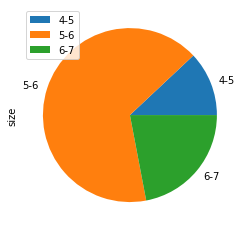

In [130]:
plt.figure(figsize=(8,6))
data.plot.pie(y='cantidad',label="size")
plt.show()

<Figure size 1296x432 with 0 Axes>

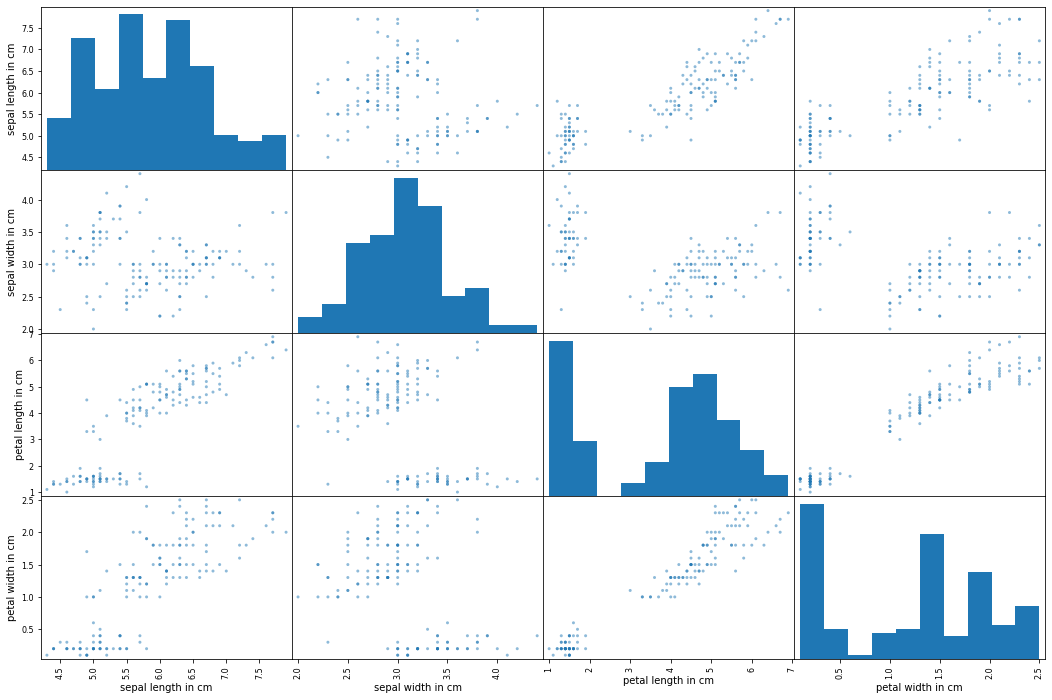

In [55]:
plt.figure(figsize=(18,6))
pd.plotting.scatter_matrix(iris,figsize=(18,12))
plt.show()

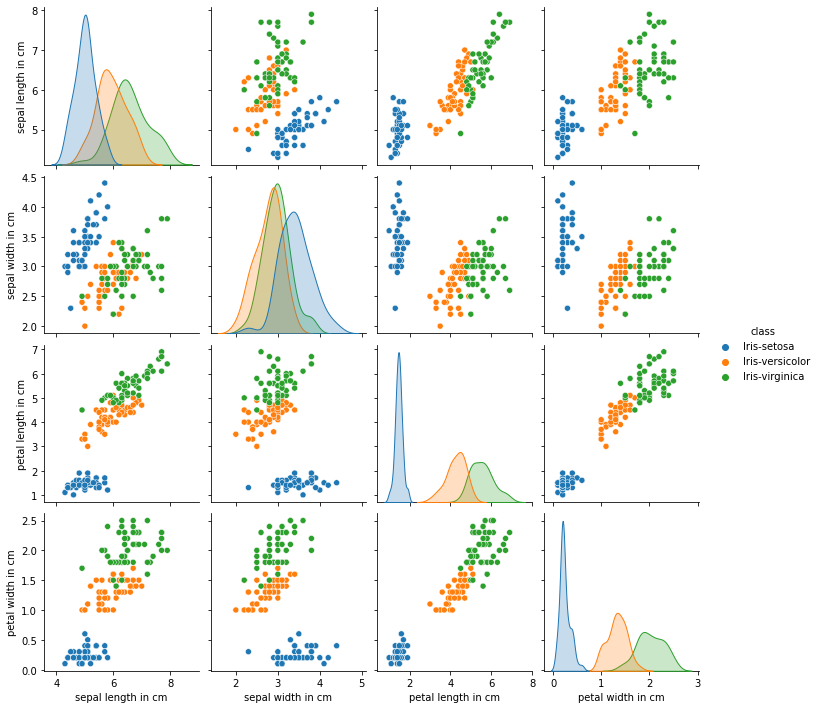

In [27]:
import seaborn as sns
sns.pairplot(iris, hue="class")
plt.show()

In [34]:
clases=list(set(iris["class"]))
print(clases)
ii=iris[iris["class"]==clases[0]]
jj=iris[iris["class"]==clases[1]]
kk=iris[iris["class"]==clases[2]]

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']


<AxesSubplot:xlabel='sepal length in cm', ylabel='Count'>

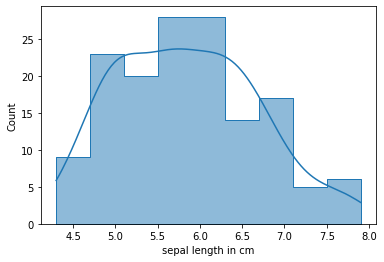

In [35]:
sns.histplot(data=iris, x="sepal length in cm", element="step", alpha=0.5, kde=True)

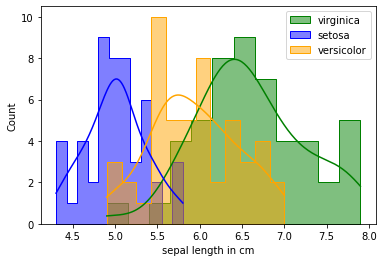

In [58]:
sns.histplot(data=ii, x="sepal length in cm", element="step", alpha=0.5, kde=True, color='green', bins=12, label="virginica")
sns.histplot(data=jj, x="sepal length in cm", element="step", alpha=0.5, kde=True, bins=12, color='blue', label="setosa")
sns.histplot(data=kk, x="sepal length in cm", element="step", alpha=0.5, kde=True, bins=12, color='orange', label="versicolor")
plt.legend()
plt.show()

<AxesSubplot:xlabel='sepal length in cm', ylabel='sepal width in cm'>

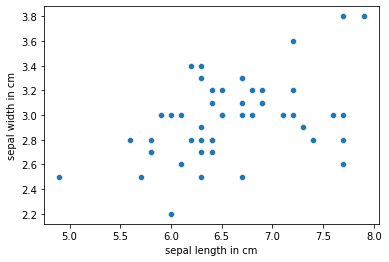

In [60]:
sns.scatterplot(data=ii, x="sepal length in cm", y="sepal width in cm")